# Linear Response Using NPA Code

### Import Modules

In [1]:
import numpy as np

from atomic_forces.average_atom.python.average_atom_geometric import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import load_NPA
from atomic_forces.average_atom.python.linear_response import response
from atomic_forces.atomOFDFT.python.physics import ThomasFermi, FermiDirac

from importlib import reload
try:
    reload(physics)
    reload(average_atom)
    reload(linear_response)
except NameError as e:
    from atomic_forces.atomOFDFT.python import physics as physics
    from atomic_forces.average_atom.python import linear_response as linear_response
    from atomic_forces.average_atom.python import average_atom_geometric as average_atom
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)


import matplotlib.pyplot as plt

import cProfile

eV = 0.0367512
π=np.pi

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

ModuleNotFoundError: No module named 'atoMEC'
Error:  name 'physics' is not defined


# Import Atom

In [54]:
folder= "/home/zach/plasma/atomic_forces/average_atom/data/"
# fname = "Al_NPA_TFD_R3.0e+01_rs3.0e+00_T1.0e+00eV_Zstar3.6.dat"
# fname = "Al_NPA_TFD_R3.0e+01_rs3.0e+00_T5.0e-01eV_Zstar3.7.dat"
# fname = "Al_NPA_TFD_R3.0e+01_rs3.0e+00_T1.0e+00eV_Zstar4.1.dat"
fname  =  'Al_NPA_TFD_R3.0e+01_rs3.0e+00_T5.0e-01eV_Zstar4.7.dat'
# fname  =  'Al_NPA_TFD_R3.0e+01_rs3.0e+00_T1.0e+00eV_Zstar4.6.dat'

atom   = load_NPA(folder + fname,TFW=False, ignore_vxc=False)

atom.run_empty_TF()

Intializing grid
Loading Data for Comparison (from George Petrov)
Z err: 0.00427102231121748


/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:75: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Z_unnorm, err = quad(rho_integrand, 0, self.rs, limit=500, epsabs=1e-5, epsrel=1e-5)


Empty ion ran and got μ = 2.685e-01 from initial μ = 2.685e-01


In [55]:
# atom.new_grid(5000)
# atom.solve_TF(verbose=True)
# atom.run_empty_TF()

## Linear Response Theory Potential

In order to effectively screen the ion potential, the pseudopotential must be such that is cancels any divergent $v_{ii}$ at low k. 

Since $$ v_{ii} = \frac{4\pi  {Z^*}^2}{k^2} - v_{ei} \delta \rho$$
      $$ \hspace{0.4in}       = \frac{4\pi}{k^2{Z^*}^2} + \delta \rho^2/\chi_{ee}$$
We have at low-k, since all $\chi_{ee} \to -k^2/(4\pi) + \mathcal{O}(k^4)$
      $$ \lim_{k\to0} v_{ii} =\lim_{k\to0} \frac{4\pi}{k^2 }\left({Z^*}^2 - \delta \rho^2 \right)$$
  
We enforce this neutrality by constructing $\lim_{k\to0} \delta \rho=Z^* $
  

In [41]:
old_δn_f = atom.δn_f

In [48]:
atom.δn_f = old_δn_f

5.096564864526772 4.70993796484321
3.7049981935349807e-06


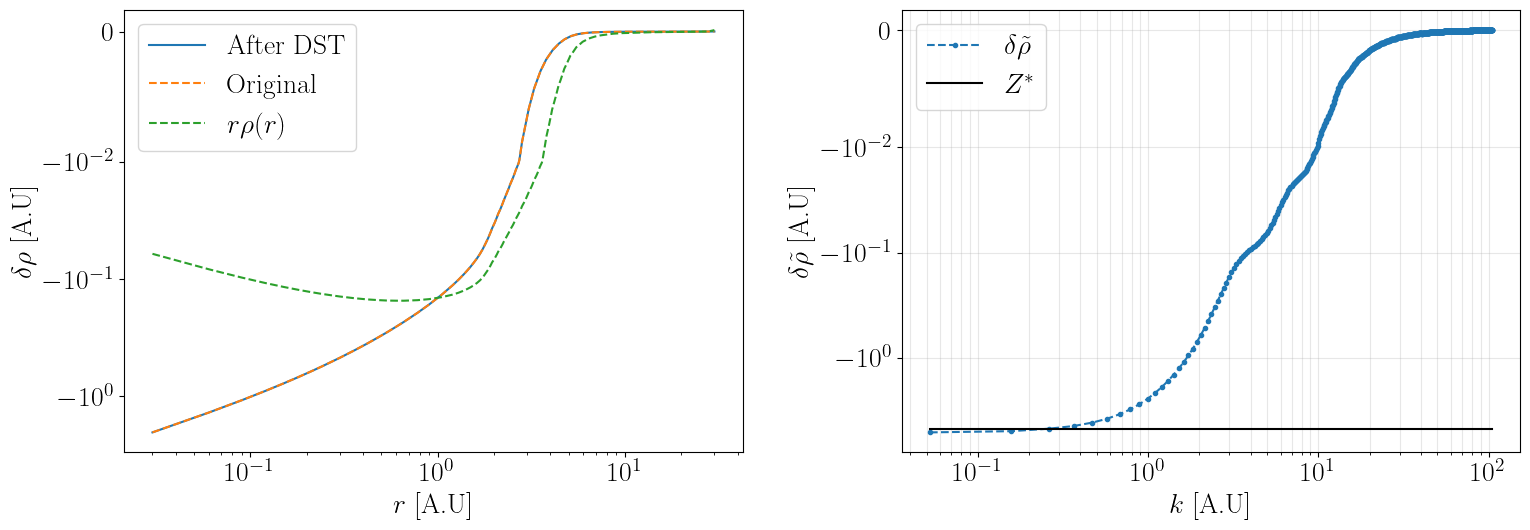

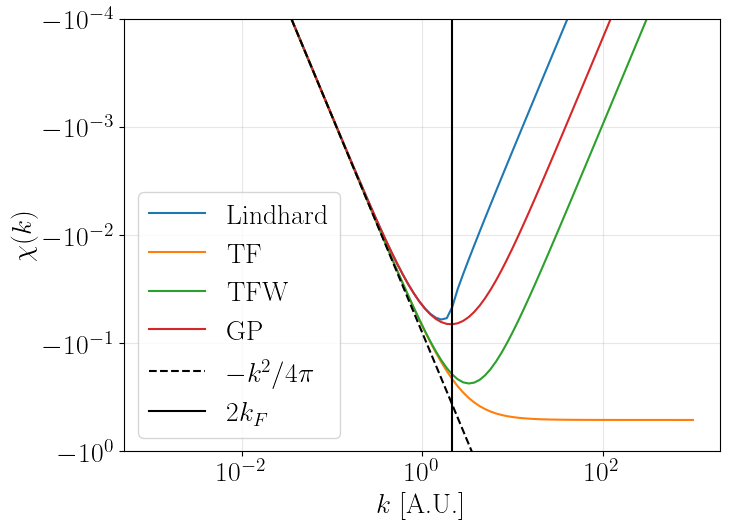

In [57]:
χtype = 'TF'
# atom = AAatom#atom1
# δatom.δn_f = atom.n_f - empty.ne# + atom.n_f[-1]
lin = response( atom,dst_type=3,N=1000,ρtype='data',χtype=χtype,linear_type='standard')
print(lin.δnf_tilde[0], lin.atom.Zstar)
# atom.δn_f = atom.δn_f * atom.Zstar /lin.δnf_tilde[0]
# lin = response( atom,dst_type=4,N=1000,ρtype='data',χtype=χtype,linear_type='standard')
# print(lin.δnf_tilde[0], lin.atom.Zstar)
lin.check_ρ()
lin.compare_χs()

##### Import GP data for comparison

In [58]:
import pandas as pd

GP_rdata=pd.read_csv("/home/zach/plasma/atomic_forces/GordonKim/data/GP_Al-Te=1eV-rspace.dat", header=0,delim_whitespace=True)
GP_kdata=pd.read_csv("/home/zach/plasma/atomic_forces/GordonKim/data/GP_Al-Te=1eV-kspace.dat", header=0,delim_whitespace=True)

#### import Carter, Huang Al Pseudopotential
https://pubs.rsc.org/en/content/articlepdf/2008/cp/b810407g
Technically I think at $T=0$, but probably accurate for $\lesssim 1$ eV

In [59]:
vei_Carter = np.array([[0.22950819672131148, 25.0000000000000],
[0.8306010928961749, 23.83802816901408],
[1.1147540983606556, 22.32394366197183],
[1.3114754098360655, 21.12676056338028],
[1.5628415300546448, 19.29577464788732],
[1.901639344262295, 16.338028169014084],
[2.2076502732240435, 13.62676056338028],
[2.6775956284153004, 9.753521126760564],
[3.0273224043715845, 7.429577464788733],
[3.431693989071038,  5.246478873239437],
[3.9562841530054644,  3.23943661971831],
[4.502732240437158,  1.971830985915493],
[5.180327868852459, 1.3380281690140845],
[6.109289617486339, 1.0211267605633803],
[6.918032786885246, 0.7746478873239437],
[7.770491803278689, 0.5985915492957746],
[9.092896174863387, 0.4577464788732394],
[10, 0.4225352112676056]])

###### Make Six Plots for Full Linear Response 

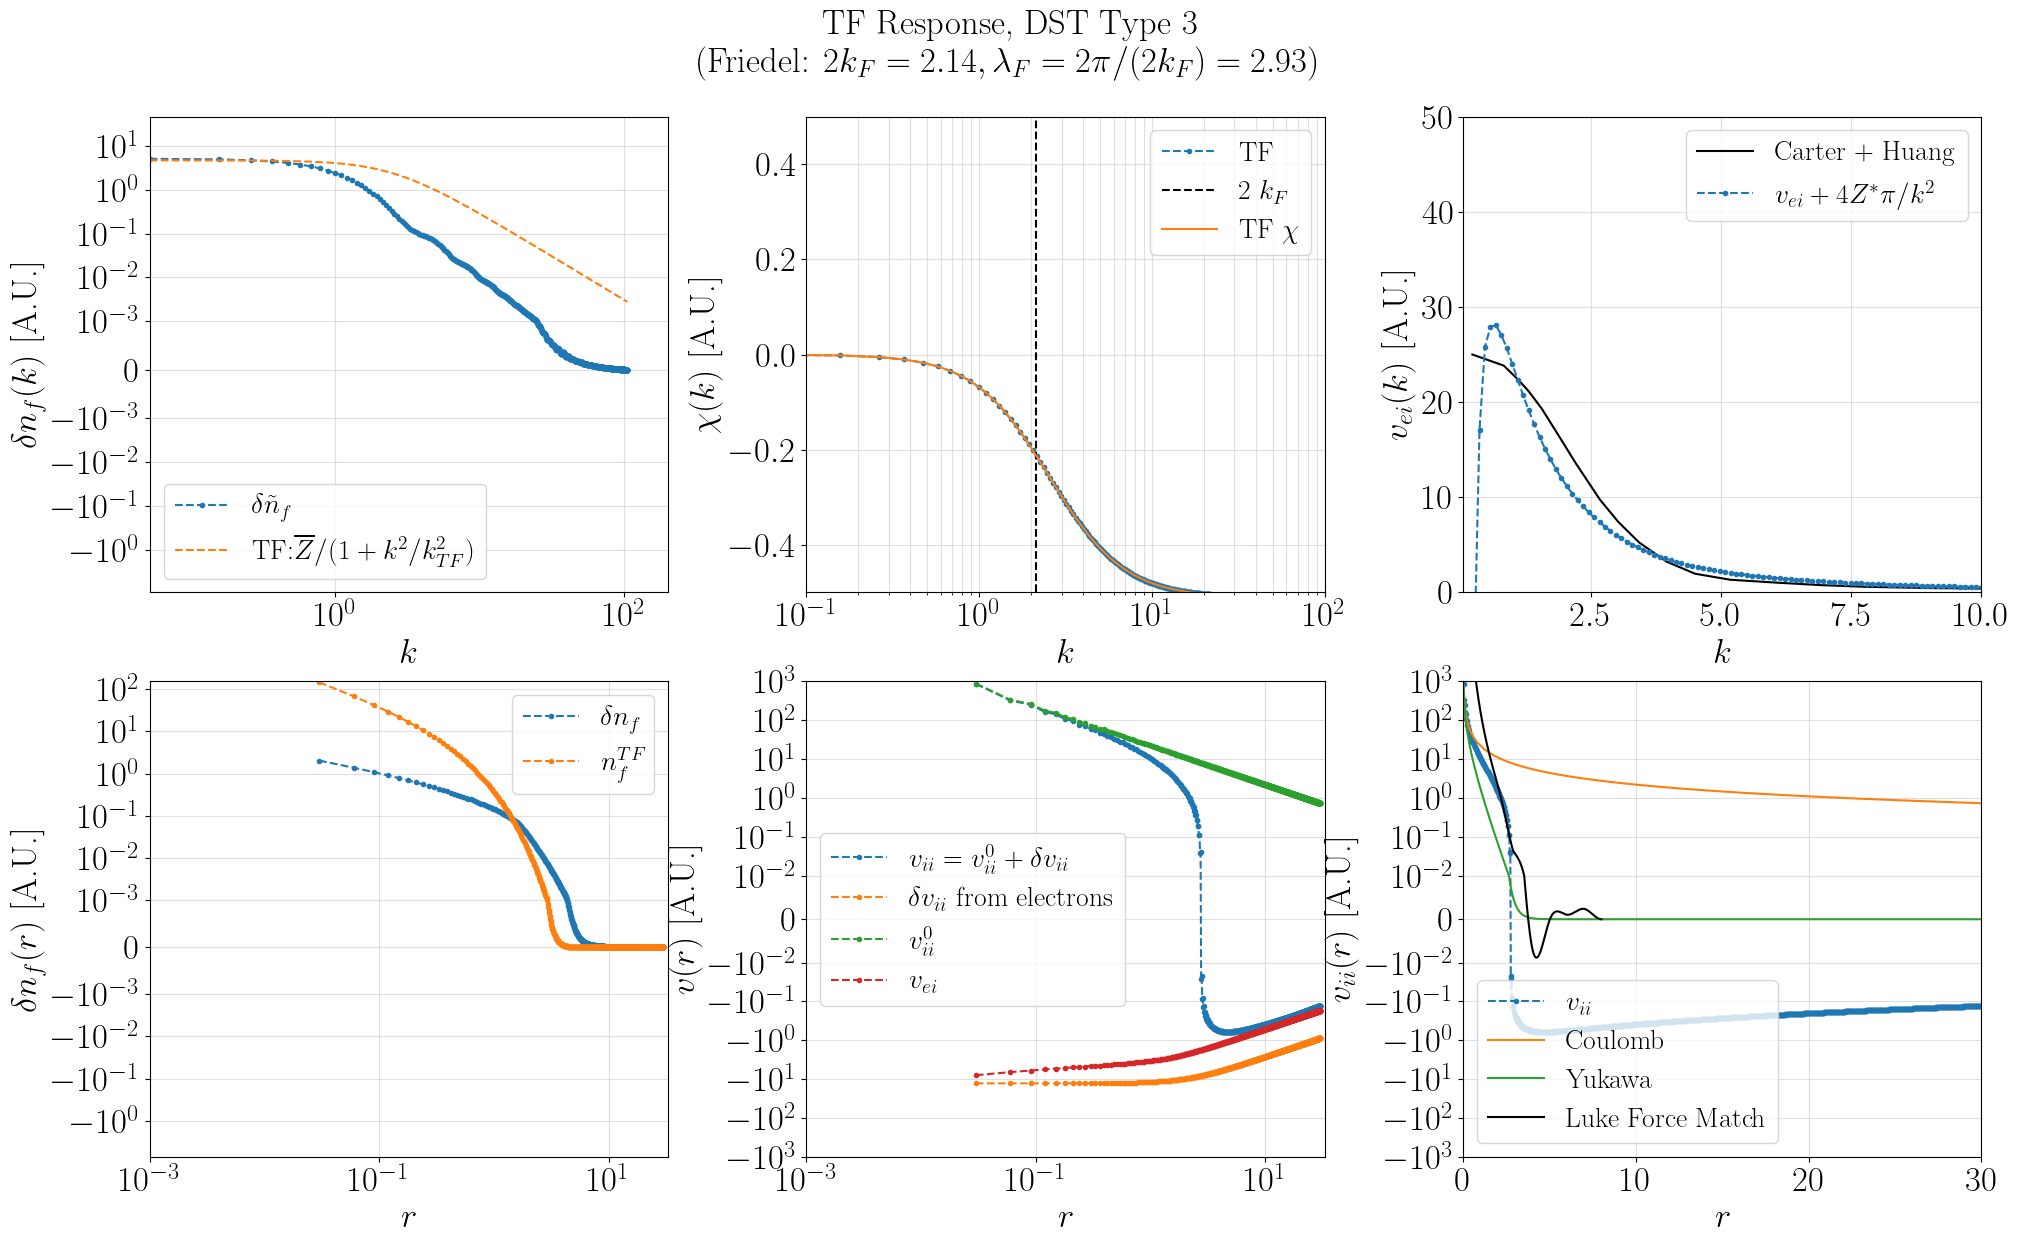

In [60]:
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq, dst, idst

rlist_luke, Vlist_luke, Flist_luke= np.genfromtxt("/home/zach/plasma/atomic_forces/data/Al_T0p5_tab.lammps.PAIR",delimiter='',skip_header=5)[:,1:].T

def plot_linear_response(check_GP=True):
    fig = plt.figure(figsize=(20,12),facecolor="w")
    gs = fig.add_gridspec(2,3)
    
    ax1=fig.add_subplot(gs[0,0])
    ax2=fig.add_subplot(gs[0,1])
    ax3=fig.add_subplot(gs[0,2])
    ax4=fig.add_subplot(gs[1,0])
    ax5=fig.add_subplot(gs[1,1])
    ax6=fig.add_subplot(gs[1,2])
    
    Zstar, kTF, EF = atom.Zstar, lin.kTF, lin.EF
    fig.suptitle("{0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
                 r"(Friedel: $2 k_F={0}, \lambda_F= 2\pi/(2k_F) ={1})$".format(np.round(2*lin.kF,2),np.round(π/lin.kF,2)  ),y=1.02,fontsize=25)
    
    ### Plot 1 ###
    k_list, r_list = lin.k_list, lin.r_list
    ax1.plot(lin.k_list,lin.δnf_tilde,'--.',label=r'$\delta \tilde{n}_f$')
    ax1.plot(k_list,Zstar/(1+k_list**2/kTF**2),'--',label='TF:$\overline{Z}/(1+k^2/k^2_{TF})$')
    ax1.set_ylabel(r'$\delta n_f(k)$ [A.U.]',fontsize=25)
    
    
    ### Plot 2 ###
    ax2.plot(lin.k_list, lin.χs,'--.',label=χtype)
    #ax1.plot(lin.k_list, k_list**2/(4*π)* kTF**2/(kTF**2 + k_list**2) ,'--',label='TF')
    kF = ((2*EF)**(1/2))
    ax2.axvline(x = 2*kF, color = 'k',linestyle='--', label = r'2 $k_F$')
    ax2.plot(lin.k_list, -lin.k_list**2/(4*π) * 1/(1+lin.k_list**2/lin.kTF**2),label=r"TF $\chi$")
    ax2.set_ylabel(r'$\chi(k)$ [A.U.]',fontsize=25)
    
    
    ### Plot 3 ###
    ax3.plot(vei_Carter.T[0],vei_Carter.T[1], 'k-', label='Carter + Huang')
    ax3.plot(lin.k_list,lin.vei_tilde + 4*π*Zstar/lin.k_list**2 ,'--.',label=r"$v_{ei} + 4 Z^* \pi/k^2$")
#     ax3.plot(lin.k_list,lin.vei_tilde,'--.',label=r"$v_{ei}$")
#     ax3.plot(lin.k_list,-4*π*Zstar/lin.k_list**2,'--',label='Coulomb')
    ax3.set_ylabel(r'$v_{ei}(k) $ [A.U.]',fontsize=25)
    
    ### Bottom Row###
    ### Plot 4 ###
    ax4.plot(lin.r_list, lin.δnf ,'--.',label=r'$\delta n_f$ ')
    ax4.plot(lin.r_list, Zstar/lin.r_list * np.exp(-lin.r_list*lin.kTF) ,'--.',label=r'$n_f^{TF}$ ')
    ax4.set_ylabel(r'$\delta n_f(r)$ [A.U.]',fontsize=25)
    
    ### Plot 5 ###
    ax5.plot(lin.r_list, lin.vii, '--.', label=r'$v_{ii}= v^0_{ii} + \delta v_{ii}$')
    ax5.plot(lin.r_list, lin.δvii,'--.', label=r'$\delta v_{ii}$ from electrons')
    ax5.plot(lin.r_list, lin.vii0,'--.', label=r'$v^0_{ii}$')
    ax5.plot(lin.r_list, lin.vei, '--.', label=r'$v_{ei}$ ')#δvii_tilde(ks),'--')
    ax5.set_ylabel(r'$v(r)$ [A.U.]',fontsize=25)
    
    if check_GP:
        ax1.plot(GP_kdata['k'], -GP_kdata['χ(k)'],label="GP Comparison")
        ax2.plot(GP_kdata['k'],GP_kdata['ne(k)'],label="GP Comparison")
        ax3.plot(GP_kdata['k'], -GP_kdata['Vei(k)'],label="GP Comparison")
    
    ### Plot 6 ###
    ax6.plot(lin.r_list, lin.vii,'--.',label=r"$v_{ii}$")
    ax6.plot(lin.r_list, [Zstar**2/r for r in lin.r_list],linestyle='-',label='Coulomb')
    ax6.plot(lin.r_list, [Zstar**2/r * np.exp(-lin.kTF*r) for r in r_list],linestyle='-',label='Yukawa')
    ax6.plot(rlist_luke, Vlist_luke,'k-',label="Luke Force Match")
    
    ax6.set_ylabel(r'$v_{ii}(r)$ [A.U.]',fontsize=25)
    
    
    for ax in [ax1,ax2,ax3]:
        ax.set_xlabel(r'$k$',fontsize=25)

    for ax in [ax4,ax5,ax6]:
        ax.set_xlabel(r'$r$',fontsize=25)
        ax.set_xscale('log')    
        #ax.set_yscale('log') 
        ax.set_xlim(1e-3,1.1*lin.R)
        
    for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
        ax.grid(which='both', alpha=0.4)
        ax.tick_params(labelsize=25)
        ax.legend(fontsize=20)
    
        
    ax1.set_xscale('log')
    ax1.set_ylim(-2*Zstar,10*Zstar)
    ax1.set_yscale('symlog',linthresh=1e-3)
    ax1.set_xlim(np.min(k_list),2e2)
    
    ax2.set_xscale('log')
    ax2.set_xlim(1e-1,1e2)
    ax2.set_ylim(-0.5,0.5)
    
#     ax3.set_xscale('log')
    ax3.set_ylim(0,50)
#     ax3.set_yscale('symlog',linthresh=25)
    ax3.set_xlim(np.min(k_list),10)
   

    ax4.set_yscale('symlog',linthresh=1e-3)
    ax4.set_xscale('log')
    ax4.set_xlim(1e-3,1.1*lin.R)


    ax5.set_yscale('symlog',linthresh=1e-2)
    ax6.set_yscale('symlog',linthresh=1e-2)
    ax5.set_ylim(-1e3,1e3)
    ax6.set_ylim(-1e3,1e3)
    
    ax6.set_xscale('linear')
    ax6.set_xlim(0,lin.R)
    
    
    plt.tight_layout(pad=0)
    plt.savefig("../media/{0}-linear_response_GPfit_type{1}.png".format(χtype,lin.dst_type),bbox_inches='tight')


plot_linear_response(check_GP=False)

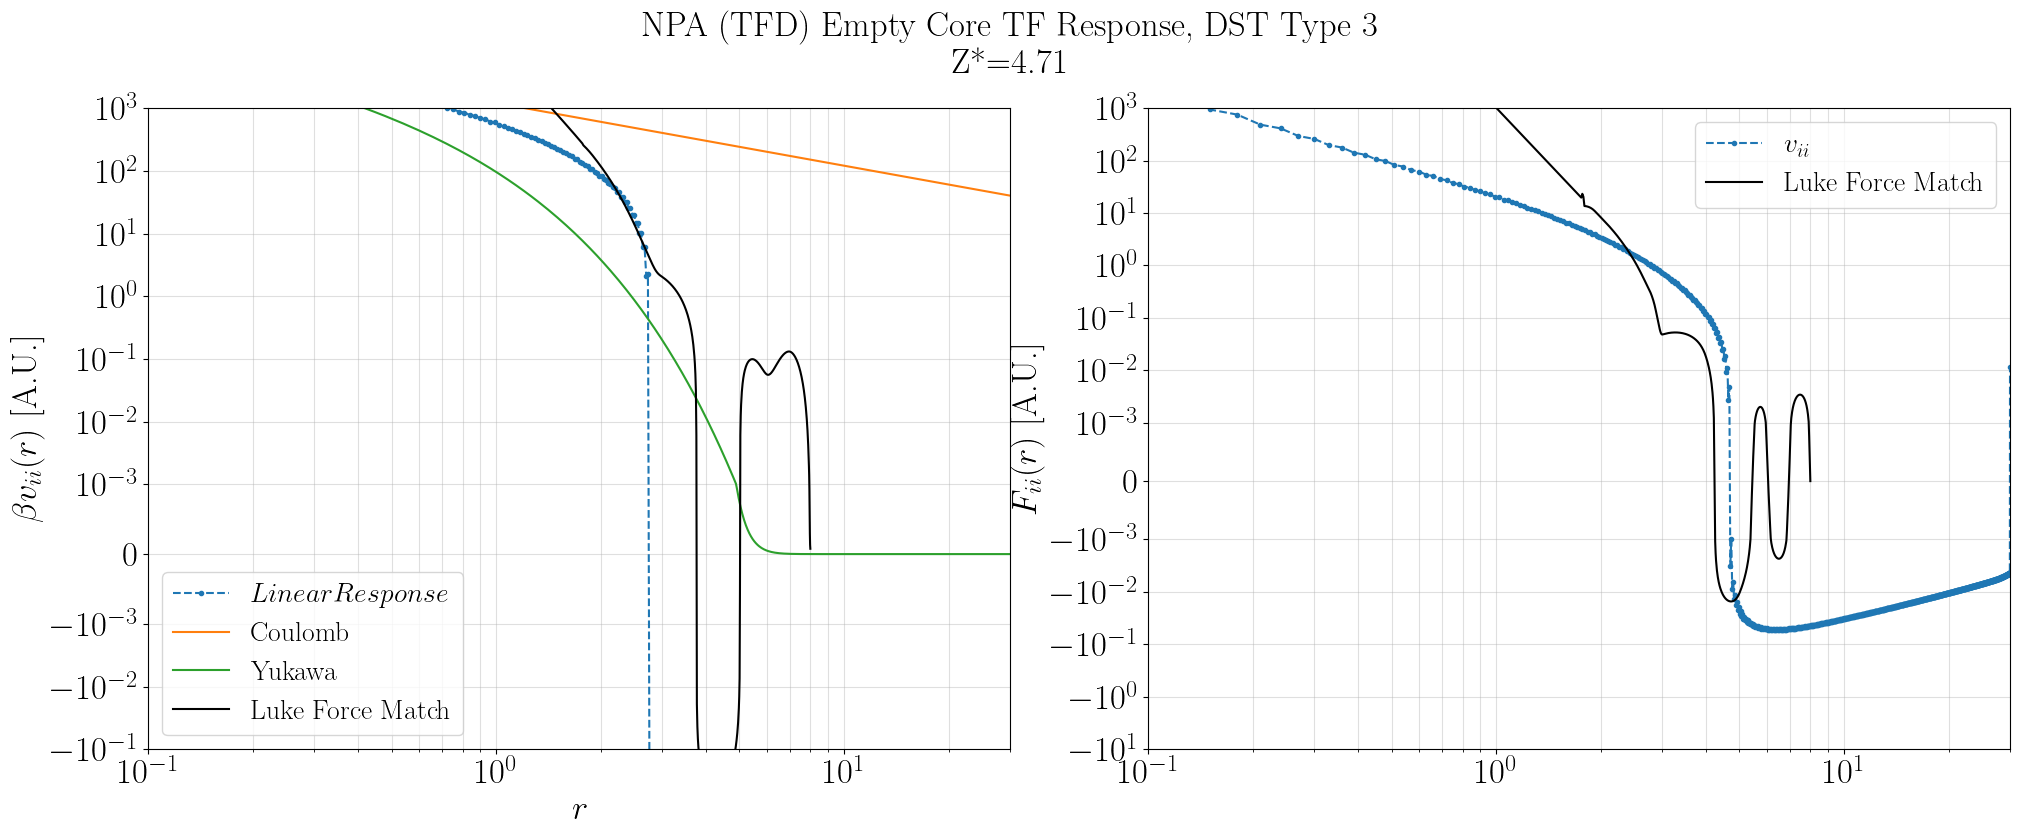

In [62]:
def plot_linear_response(check_GP=True):
    fig = plt.figure(figsize=(20,8),facecolor="w")
    gs = fig.add_gridspec(1,2)
    
    ax1=fig.add_subplot(gs[0,0])
    ax2=fig.add_subplot(gs[0,1])
    
    Zstar, kTF, EF = atom.Zstar, lin.kTF, lin.EF
#     fig.suptitle("{0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
#                  r"(Friedel: $2 k_F={0}, \lambda_F= 2\pi/(2k_F) ={1})$".format(np.round(2*lin.kF,2),np.round(π/lin.kF,2)  ),y=1.02,fontsize=25)
    fig.suptitle("NPA (TFD) Empty Core {0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
                 "Z*={0:.2f}".format(atom.Zstar),y=1.02,fontsize=25)
#     fig.suptitle("NPA (TFD) HNC, {0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
#                  "Z*={0:.2f}".format(atom.Zstar),y=1.02,fontsize=25)
    
    k_list, r_list = lin.k_list, lin.r_list

    ### Plot 1 ###
    ax1.plot(lin.r_list, lin.vii/atom.T,'--.',label=r"$Linear Response$")
    ax1.plot(lin.r_list, np.array([Zstar**2/r for r in lin.r_list])/atom.T,linestyle='-',label='Coulomb')
    ax1.plot(lin.r_list, np.array([Zstar**2/r * np.exp(-lin.kTF*r) for r in r_list])/atom.T,linestyle='-',label='Yukawa')
    ax1.plot(rlist_luke, Vlist_luke/atom.T,'k-',label="Luke Force Match")
    
    ax1.set_ylabel(r'$\beta v_{ii}(r)$ [A.U.]',fontsize=25)
    
    ## Plot 2 ###
    ax2.plot(lin.r_list, -np.gradient(lin.vii, lin.r_list),'--.',label=r"$v_{ii}$")
#     ax2.plot(lin.r_list[:-1], [Zstar**2/r for r in lin.r_list],linestyle='-',label='Coulomb')
#     ax2.plot(lin.r_list[:-1], [Zstar**2/r * np.exp(-lin.kTF*r) for r in r_list],linestyle='-',label='Yukawa')
    ax2.plot(rlist_luke, Flist_luke,'k-',label="Luke Force Match")
    
    ax2.set_ylabel(r'$F_{ii}(r)$ [A.U.]',fontsize=25)
    
    
    for ax in [ax1]:
        ax.set_xlabel(r'$r$',fontsize=25)
        ax.set_xscale('log')    
        #ax.set_yscale('log') 
        
    for ax in [ax1,ax2]:
        ax.grid(which='both', alpha=0.4)
        ax.tick_params(labelsize=25)
        ax.legend(fontsize=20)
    
    
    ax1.set_yscale('symlog',linthresh=1e-3)
    ax1.set_ylim(-1e-1,1e3)
    ax2.set_yscale('symlog',linthresh=1e-3)
    ax2.set_ylim(-1e1,1e3)
    
    ax1.set_xscale('log')
    ax1.set_xlim(1e-1,lin.R)
    ax2.set_xscale('log')
    ax2.set_xlim(1e-1,lin.R)
    
    
    plt.tight_layout(pad=0)
#     plt.savefig("../media/{0}-linear_response_GPfit_type{1}.png".format(χtype,lin.dst_type),bbox_inches='tight')


plot_linear_response(check_GP=False)

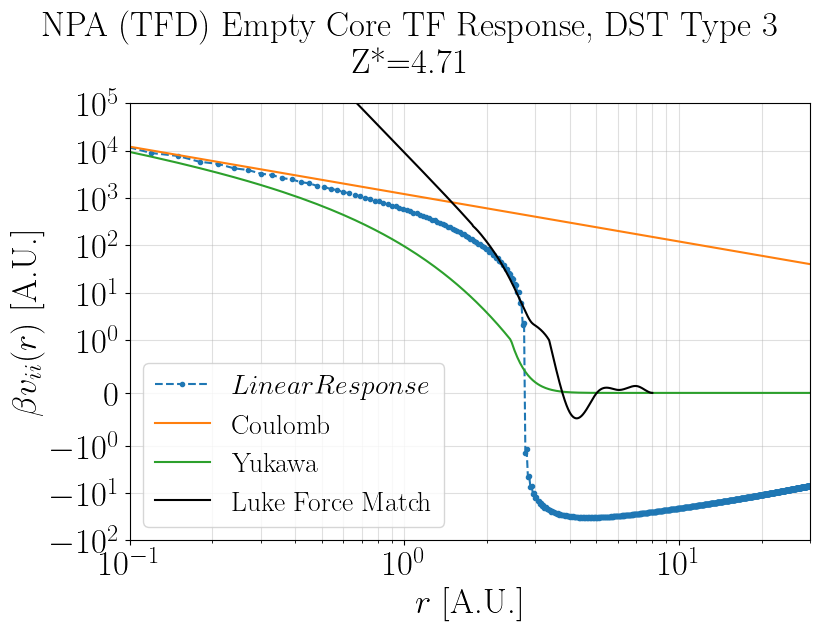

In [71]:
def plot_linear_response(check_GP=True):
    fig = plt.figure(figsize=(8,6),facecolor="w")
    gs = fig.add_gridspec(1,1)
    
    ax1=fig.add_subplot(gs[0,0])
#     ax2=fig.add_subplot(gs[0,1])
    
    Zstar, kTF, EF = atom.Zstar, lin.kTF, lin.EF
#     fig.suptitle("{0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
#                  r"(Friedel: $2 k_F={0}, \lambda_F= 2\pi/(2k_F) ={1})$".format(np.round(2*lin.kF,2),np.round(π/lin.kF,2)  ),y=1.02,fontsize=25)
    fig.suptitle("NPA (TFD) Empty Core {0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
                 "Z*={0:.2f}".format(atom.Zstar),y=1.02,fontsize=25)
#     fig.suptitle("NPA (TFD) HNC, {0} Response, DST Type {1}\n".format(χtype, lin.dst_type) + 
#                  "Z*={0:.2f}".format(atom.Zstar),y=1.02,fontsize=25)
    
    k_list, r_list = lin.k_list, lin.r_list

    ### Plot 1 ###
    ax1.plot(lin.r_list, lin.vii/atom.T,'--.',label=r"$Linear Response$")
    ax1.plot(lin.r_list, np.array([Zstar**2/r for r in lin.r_list])/atom.T,linestyle='-',label='Coulomb')
    ax1.plot(lin.r_list, np.array([Zstar**2/r * np.exp(-lin.kTF*r) for r in r_list])/atom.T,linestyle='-',label='Yukawa')
    ax1.plot(rlist_luke, Vlist_luke/atom.T,'k-',label="Luke Force Match")
    
    ax1.set_ylabel(r'$\beta v_{ii}(r)$ [A.U.]',fontsize=25)
    
    ## Plot 2 ###
#     ax2.plot(lin.r_list, -np.gradient(lin.vii, lin.r_list),'--.',label=r"$v_{ii}$")
# #     ax2.plot(lin.r_list[:-1], [Zstar**2/r for r in lin.r_list],linestyle='-',label='Coulomb')
# #     ax2.plot(lin.r_list[:-1], [Zstar**2/r * np.exp(-lin.kTF*r) for r in r_list],linestyle='-',label='Yukawa')
#     ax2.plot(rlist_luke, Flist_luke,'k-',label="Luke Force Match")
    
#     ax2.set_ylabel(r'$F_{ii}(r)$ [A.U.]',fontsize=25)
    
    
    for ax in [ax1]:
        ax.set_xlabel(r'$r$ [A.U.]',fontsize=25)
        ax.set_xscale('log')    
        #ax.set_yscale('log') 
        
    for ax in [ax1]:
        ax.grid(which='both', alpha=0.4)
        ax.tick_params(labelsize=25)
        ax.legend(fontsize=20)
    
    
    ax1.set_yscale('symlog',linthresh=1)
    ax1.set_ylim(-1e2,1e5)
#     ax2.set_yscale('symlog',linthresh=1e-3)
#     ax2.set_ylim(-1e1,1e3)
    
    ax1.set_xscale('log')
    ax1.set_xlim(1e-1,lin.R)
#     ax2.set_xscale('log')
#     ax2.set_xlim(1e-1,lin.R)
    
    
    plt.tight_layout(pad=0)
#     plt.savefig("../media/{0}-linear_response_GPfit_type{1}.png".format(χtype,lin.dst_type),bbox_inches='tight')


plot_linear_response(check_GP=False)

#### Generate Simple Potentials

In [29]:
def temp():
    vol = 4/3*π*rs**3
    n0 = Zbar/vol
    EF = 0.5*(3*π**2*n0)**(2/3)
    kTF = np.sqrt(  4*π* Zbar*n0  /np.sqrt(T**2 + (2/3*EF)**2)  ) #Murillo finite-T Thomas-fermi interpolation
    print(Zbar, lin.Zbar)
    print(kTF, lin.kTF)
    print(EF, lin.EF)
    print(T, lin.T)
    
temp()
V_yukawa = lambda R: Z**2/R*np.exp(-lin.kTF*R)
F_yukawa = lambda R: Z**2/R**2*np.exp(-lin.kTF*R)*(1 + lin.kTF*R)
V_yukawa = np.vectorize(V_yukawa)
F_yukawa = np.vectorize(F_yukawa)
V_Coulomb=  lambda R: Zbar**2/R
V_Coulomb = np.vectorize(V_Coulomb)

NameError: name 'rs' is not defined

In [ ]:
def plot_potential(R_list,V_lists,labels,compare=False,force=False,colors=None, 
                   savename="temp.png",styles=None,V_unit='au',
                   radial_unit="angstrom",individual=False):
    
    fig, ax = plt.subplots()#nrows=2)
    fig.set_size_inches(10, 8, forward=True)
    
    ## Adjust Units from Natural units ##
    eV = 1/(2 * 13.606) #Since 1/2=Ry=13.6 eV
    angperbohr=0.529177211 #converts from nautral units to Angstrom
    
    _R_list=np.array(list(R_list))
    _rlist_luke, _Vlists, _Vlist_luke, _Flist_luke = rlist_luke.copy(), V_lists.copy(), Vlist_luke.copy(), Flist_luke.copy()
    
    if V_unit=='au':
        print("A.U.")
        V_unit_name="A.U."
        _Vlist_luke *= eV
        _Flist_luke *= eV
        
    elif V_unit=='eV':
        print("eV")
        V_unit_name='eV'
        _Vlists*=1/eV
    
    else:
        print("BROKEN")
        return 0
    
    if radial_unit=='angstrom':
        ax.set_xlabel(r'$R [\overset{\circ}{A}]$',fontsize=20)
        _R_list *= angperbohr
 
    elif radial_unit=='au':
        ax.set_xlabel(r'$R$ [A.U.]',fontsize=20)
        _rlist_luke *= 1/angperbohr    ## After unit adjustment, can compute force ##
        _Flist_luke *= angperbohr
    else:
        print("BROKEN")
        return 0
    

    Flists = [-(V[1:]-V[:-1])/(R_list[1:]-R_list[:-1]) for V in _Vlists]
    
    #for ax in axs:
    if colors==None:
        cmap = plt.get_cmap("tab10")
        colors = [cmap(i) for i in range(len(Vlists))]
    if styles==None:
        styles=['-']*len(_Vlists)
    ###  PLOT ###
    if force: 
        _R_list=R_list[:-1]
        for Flist, label, style,color in zip(Flists,labels,styles,colors):
            ax.plot(_R_list, Flist,linestyle=style,color=color,label=label)
    else:
        for Vlist, label, style,color in zip(_Vlists,labels,styles,colors):
            ax.plot(_R_list, Vlist-Vlist[-1],linestyle=style,color=color,label=label)
    
    
    if force:
        ax.set_ylabel('F(r) [{0}]'.format(V_unit_name),fontsize=20)
        if compare==True: 
            ax.plot(_rlist_luke, _Flist_luke,'r--',label="Luke force matched")
        #ax.plot(_R_list,F_yukawa(_R_list),'k--',label="Yukawa (Z=13)")
    else:
        ax.set_ylabel('V(r) [{0}]'.format(V_unit_name),fontsize=20)
        if compare==True: 
            ax.plot(_rlist_luke, _Vlist_luke,'r--',label="Luke force matched")
            ax.plot(_R_list,lin.vii,'b--',label="Linear Response")
            ax.plot(_rlist_luke,V_yukawa(_rlist_luke),'k-.',label="Yukawa (Z=13)")
            ax.plot(_rlist_luke,V_Coulomb(_rlist_luke),'c-.',label="Coulomb (Z={})".format(round(Zbar,3)))

    ax.set_ylim(-1,1e3)
    #ax.set_ylim(1e-4,1e1)
    ax.set_yscale('symlog',linscale=1)
    #ax.set_yscale('log')
    ax.set_xlim(min(_R_list),max(_R_list))
    #ax.set_xlim(0.5,max(_R_list))

    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis="both",direction="in",width=2,length=10)#, pad=-22)
    for i,name in enumerate(ax.spines):
        ax.spines[name].set_linewidth(2)
        #[spine.set_linewidth(0.1) for i,spine in enumerate(ax.spines())]

    ax.legend(fontsize=20)
    #fig.tight_layout()
    plt.subplots_adjust(hspace=0.1)
    
    bbox= dict(boxstyle='round', facecolor='white', alpha=0.5)
    info_string="Al\n T={0} eV \n $r_s$={1}".format(round(TeV,3),round(rs,3))
    ax.text(0.02,.85,info_string,transform=ax.transAxes,bbox=bbox,fontsize=20)
    
    plt.savefig("../figures/{}".format(savename),bbox_inches='tight',facecolor="w")

    plt.show()
    
################# PLOTTING DATA ####################
cmap = plt.get_cmap("tab10")
## For comparing ##
# V_data = [VK_list_g,Vxc_list_g,VK_list_v,Vxc_list_v,VC_list,Vtot_list_g,Vtot_list_v ]
# labels=["grid-VK","grid-Vxc","vegas-VK","vegas-Vxc","VC","grid-Total","vegas-Total"]
# styles=["-"]*2+["--"]*2+['-']+["-"]+['--']
# colors = [cmap(i) for i in range(2)]*2+[cmap(2)] + [cmap(3)]*2
###################
## Plotting all ##
# V_data = np.array([VK_list,Vxc_list,VC_list,Vtot_list ])
# labels=[r"$\mathcal{F}_K$",r"$V_{xc}$",r"$V_C$","$V_{total}(R)$"]
# styles=["-"]*4#+["--"]*2+['-']+["-"]+['--']
# colors = [cmap(i) for i in range(3)] + ['k']
# savename="Al_force_petrov_T1eV_rs3_all_correctK.png"
###################
# Only total ##
# V_data = np.array([Vtot_list ])
# #labels=["$V_{total}(R)$"]
# labels=["Gordon-Kim TF"]
# styles=["-"]
# colors = ['k']
# savename="Al_force_petrov_T1eV_rs3_compare.png"
###################
## Compare XC #
####
# V_data = np.array([Vxc_list_v,Vc_list_v,Vex_list_v,np.array(Vex_list_v) +np.array(Vc_list_v) ])
# labels=[r"$V_{xc}$",r"$V_{c}$ 0T",r"$V_{ex}$ 0T",r"$V_{xc}$ 0T"]
# styles=["-"]*1 + ["--"]*2+["--"]
# colors = [cmap(i) for i in range(1)]+[cmap(i) for i in range(1,3)]+[cmap(i) for i in range(1)] 
###################
## Plotting average all ##
# V_data = np.array([VK_list_av,Vxc_list_av,VC_list_av,Vtot_list_av ])
# labels=[r"$\mathcal{F}_K$",r"$V_{xc}$",r"$V_C$","$V_{total}(R)$"]
# styles=["-"]*4#+["--"]*2+['-']+["-"]+['--']
# colors = [cmap(i) for i in range(3)] + ['k']
# savename="Al_force_petrov_T1eV_rs3_all_correctK.png"
###################
# Linear Response ##
V_data = np.array([ ])
#labels=["$V_{total}(R)$"]
labels=[""]
styles=["-"]
colors = ['k']
savename="Al_force_petrov_T1eV_rs3_compare.png"
###################
#plot_potential(R_list, V_data ,labels,styles=styles,colors=colors, savename=savename,individual=True,V_unit='au')

plot_potential(lin.r_list, V_data ,labels,compare=True,force=False,
               styles=styles,colors=colors, individual=True,V_unit='au',
               radial_unit="au")#, savename=savename)




## Plot Electron Densities of Atomic Pair 

/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:748: RuntimeWarning: divide by zero encountered in log10
  contours = plt.contour(self.X,self.Y, np.log10(rho_grid))
/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:748: RuntimeWarning: invalid value encountered in log10
  contours = plt.contour(self.X,self.Y, np.log10(rho_grid))
/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:749: RuntimeWarning: divide by zero encountered in log10
  contourfs = plt.contourf(self.X,self.Y,np.log10(rho_grid))
/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:749: RuntimeWarning: invalid value encountered in log10
  contourfs = plt.contourf(self.X,self.Y,np.log10(rho_grid))


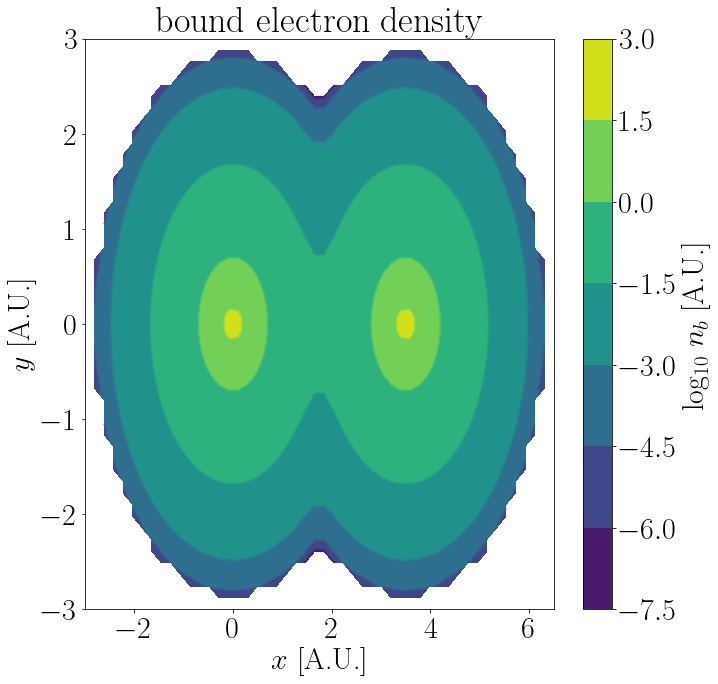

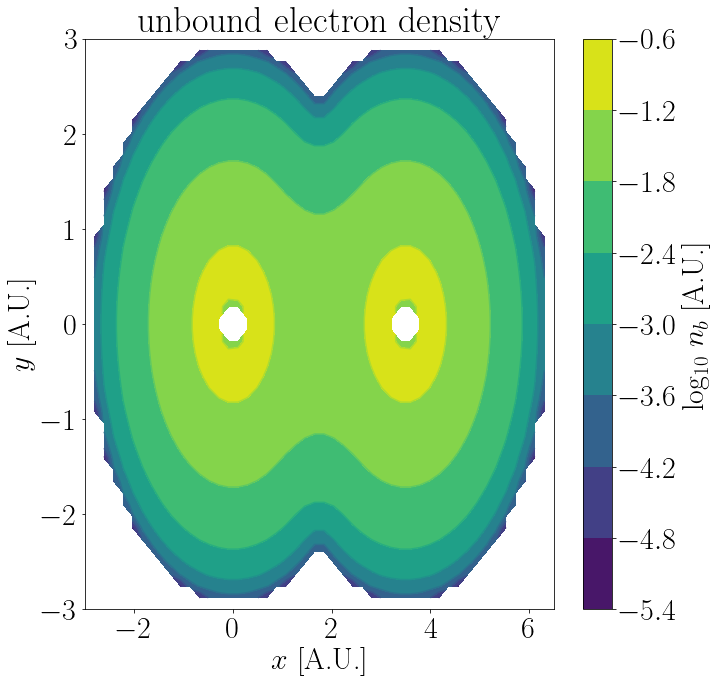

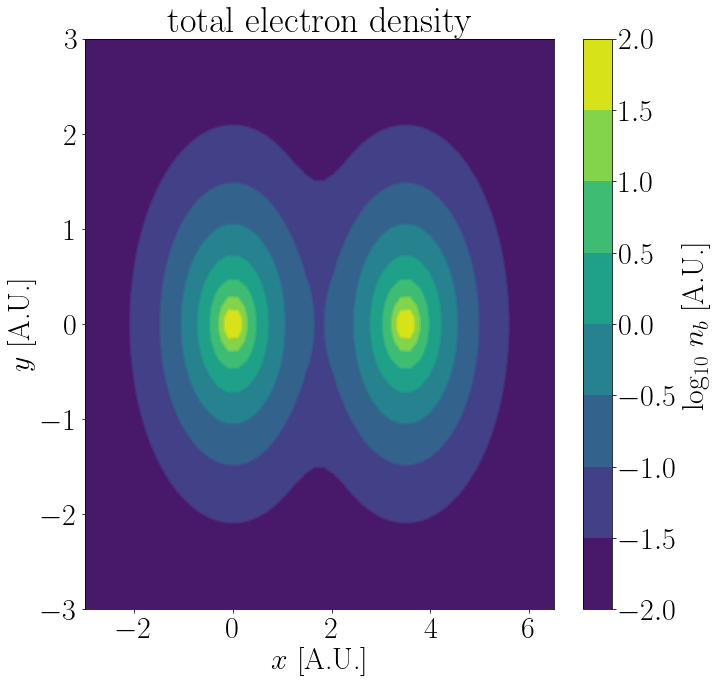

In [287]:
def plot_densities(R):
    pair.update_R(R)
    pair.plot_density('bound')
    pair.plot_density('unbound')
    pair.plot_density('total')
plot_densities(3.5)